# Описание проекта.

**Цель проекта** - создать систему, которая могла бы оценить риск ДТП по выбранному маршруту движения. 

**Описание проекта**: Под риском понимается вероятность ДТП с любым повреждением транспортного средства. Как только водитель забронировал автомобиль, сел за руль и выбрал маршрут, система должна оценить уровень риска. Если уровень риска высок, водитель увидит предупреждение и рекомендации по маршруту.
Идея создания такой системы находится в стадии предварительного обсуждения и проработки. Чёткого алгоритма работы и подобных решений на рынке ещё не существует. Текущая задача — понять, возможно ли предсказывать ДТП, опираясь на статистические данные одного из регионов.

**Идея решения задачи от заказчика:** 
- Создать модель предсказания ДТП (целевое значение — at_fault (виновник) в таблице parties)
- Для модели выбрать тип виновника — только машина (car).
- Выбрать случаи, когда ДТП привело к любым повреждениям транспортного средства, кроме типа SCRATCH (царапина).
- Для моделирования ограничиться данными за 2012 год — они самые свежие.
- Обязательное условие — учесть фактор возраста автомобиля.
- На основе модели исследовать основные факторы ДТП.

**Понять, помогут ли результаты моделирования и анализ важности факторов, ответить на вопросы:** 
- Возможно ли создать адекватную системы оценки водительского риска при выдаче авто?
- Какие ещё факторы нужно учесть?
- Нужно ли оборудовать автомобиль какими-либо датчиками или камерой?

**Дополнительные идеи для улучшения качества работы системы от разработчика:**
- Внедрение в модель системы анализа движения автомобиля.

**ЗАДАЧА.**
В момент посадки в авто определить вероятность с которой автомобиль попадет в ДТП. По вине водителя. Если вероятность высока, система должна выдать предупреждение.

# Описание данных.

![Схема БД.](https://raw.githubusercontent.com/htoniy/-Data-Science.-Deep-learning/main/02%20Оценка%20рисков%20ДТП%20по%20выбранному%20маршруту%20движения/DB%20scheme/DB_scheme.png)

**Краткое описание таблиц:**

        1) collisions — общая информация о ДТП. 
        Имеет уникальный case_id. Эта таблица описывает общую информацию о ДТП. Например, где оно произошло и 
        когда.
        2) parties — информация об участниках ДТП.
        Имеет неуникальный case_id, который сопоставляется с соответствующим ДТП в таблице collisions. Каждая
        строка здесь описывает одну из сторон, участвующих в ДТП. Если столкнулись две машины, в этой таблице 
        должно быть две строки с совпадением case_id. Если нужен уникальный идентификатор, это case_id and 
        party_number.
        2) vehicles — информация о пострадавших машинах.
        Имеет неуникальные case_id и неуникальные party_number, которые сопоставляются с таблицей collisions и 
        таблицей parties. Если нужен уникальный идентификатор, это case_id and party_number.

**<p align="center"> collisions (информация о происшествиях) </p>**

| Описание                                | Обозначение в таблице             | Подробнее                                                                                          |
|-----------------------------------------|----------------------------------|---------------------------------------------------------------------------------------------------|
| Идентификационный номер в базе данных   | CASE_ID                          | Уникальный номер для зарегистрированного происшествия в таблице происшествий.                      |
| Дата происшествия                        | COLLISION_DATE                   | Формат год/месяц/день                                                                            |
| Время происшествия                       | COLLISION_TIME                   | Формат: 24-часовой                                                                              |
| Является ли место происшествие перекрёстком | INTERSECTION                   | Y — Intersection (перекрёсток) N — Not Intersection (не перекрёсток) -- — Not stated (Не указано) |
| Погода                                   | WEATHER_1                        | A — Clear (Ясно) B — Cloudy (Облачно) C — Raining (Дождь) D — Snowing (Снегопад) E — Fog (Туман) F — Other (Другое) G — Wind (Ветер) - — Not Stated (Не указано) |
| Серьёзность происшествия                 | COLLISION_DAMAGE                 | 1 — FATAL ТС (Не подлежит восстановлению) 2 — SEVERE DAMAGE (Серьёзный ремонт, большая часть под замену/Серьёзное повреждение капитального строения) 3 — MIDDLE DAMAGE (Средний ремонт, машина в целом на ходу/Строение в целом устояло) 4 — SMALL DAMAGE (Отдельный элемент кузова под замену/покраску) 0 – SCRATCH (Царапина) |
| Основной фактор аварии                   | PRIMARY_COLL_FACTOR               | A — Code Violation (Нарушение правил ПДД) B — Other Improper Driving (Другое неправильное вождение) C — Other Than Driver (Кроме водителя) D — Unknown (Неизвестно) E — Fell Asleep (Заснул) - — Not Stated (Не указано) |
| Состояние дороги                         | ROAD_SURFACE                     | A — Dry (Сухая) B — Wet (Мокрая) C — Snowy or Icy (Заснеженная или обледенелая) D — Slippery (Muddy, Oily, etc.) (Скользкая, грязная, маслянистая и т. д.) - — Not Stated (Не указано) |
| Освещение                               | LIGHTING                         | A — Daylight (Дневной свет) B — Dusk-Dawn (Сумерки-Рассвет) C — Dark-Street Lights (Темно-Уличные фонари) D — Dark-No Street Lights (Темно-Нет уличных фонарей) E — Dark-Street Lights Not Functioning (Темно-Уличные фонари не работают) - — Not Stated (Не указано) |
| Номер географических районов, где произошло ДТП | COUNTY_CITY_LOCATION         | число                                                                                            |
| Названия географических районов, где произошло ДТП | COUNTY_LOCATION            | список разных названий, категориальный тип данных                                                    |
| Направление движения                    | DIRECTION                        | N — North (Север) E — East (Восток) S — South (Юг) W — West (Запад) - or blank — Not State (Не указано) на перекрёстке |
| Расстояние от главной дороги (метры)    | DISTANCE                         | число                                                                                            |
| Тип дороги                              | LOCATION_TYPE                    | H — Highway (Шоссе) I — Intersection (Перекрёсток) R — Ramp (or Collector) (Рампа) - or blank — Not State Highway (Не указано)
| Количество участников                   | PARTY_COUNT                      | Число                                                                                             |

| Описание                                | Обозначение в таблице             | Подробнее                                                                                          |
|-----------------------------------------|----------------------------------|---------------------------------------------------------------------------------------------------|
| Количество участников                   | PARTY_COUNT                      | Число                                                                                             |
| Категория нарушения                     | PCF_VIOLATION_CATEGORY            | 01 — Driving or Bicycling Under the Influence of Alcohol or Drug (Вождение или езда на велосипеде в состоянии алкогольного или наркотического опьянения) |
|                                         |                                  | 02 — Impeding Traffic (Препятствие движению транспорта)                                          |
|                                         |                                  | 03 — Unsafe Speed (Превышение скорости)                                                         |
|                                         |                                  | 04 — Following Too Closely (Опасное сближение)                                                 |
|                                         |                                  | 05 — Wrong Side of Road (Неправильная сторона дороги)                                          |
|                                         |                                  | 06 — Improper Passing (Неправильное движение)                                                  |
|                                         |                                  | 07 — Unsafe Lane Change (Небезопасная смена полосы движения)                                    |
|                                         |                                  | 08 — Improper Turning (Неправильный поворот)                                                   |
|                                         |                                  | 09 — Automobile Right of Way (Автомобильное право проезда)                                      |
|                                         |                                  | 10 — Pedestrian Right of Way (Пешеходное право проезда)                                         |
|                                         |                                  | 11 — Pedestrian Violation (Нарушение пешеходами)                                              |
|                                         |                                  | 12 — Traffic Signals and Signs (Дорожные сигналы и знаки)                                       |
|                                         |                                  | 13 — Hazardous Parking (Неправильная парковка)                                                 |
|                                         |                                  | 14 — Lights (Освещение)                                                                         |
|                                         |                                  | 15 — Brakes (Тормоза)                                                                           |
|                                         |                                  | 16 — Other Equipment (Другое оборудование)                                                     |
|                                         |                                  | 17 — Other Hazardous Violation (Другие нарушения)                                              |
|                                         |                                  | 18 — Other Than Driver (or Pedestrian) (Кроме водителя или пешехода)                           |
|                                         |                                  | 19 — Speeding (Скорость)                                                                        |
|                                         |                                  | 20 — Pedestrian dui (Нарушение пешехода)                                                       |
|                                         |                                  | 21 — Unsafe Starting or Backing (Опасный старт)                                                 |
|                                         |                                  | 22 — Other Improper Driving (Другое неправильное вождение)                                      |
|                                         |                                  | 23 — Pedestrian or “Other” Under the Influence of Alcohol or Drug (Пешеход или «Другой» в состоянии алкогольного или наркотического опьянения) |
|                                         |                                  | 24 — Fell Asleep (Заснул)                                                                       |
|                                         |                                  | 00 — Unknown (Неизвестно)                                                                       |
|                                         |                                  | - — Not Stated (Не указано)                                                                    |
| Тип аварии                              | TYPE_OF_COLLISION                 | A — Head-On (Лоб в лоб)                                                                         |
|                                         |                                  | B — Sideswipe (Сторона)                                                                         |
|                                         |                                  | C — Rear End (Столкновение задней частью)                                                     |
|                                         |                                  | D — Broadside (Боковой удар)                                                                    |
|                                         |                                  | E — Hit Object (Удар объекта)                                                                   |
|                                         |                                  | F — Overturned (Опрокинутый)                                                                    |
|                                         |                                  | G — Vehicle (транспортное средство/ Пешеход)                                                  |
|                                         |                                  | H — Other (Другое)                                                                              |
|                                         |                                  | - — Not Stated (Не указано)                                                                    |
| Дополнительные участники ДТП            | MOTOR_VEHICLE_INVOLVED_WITH        | Other motor vehicle (Другой автомобиль)                                                        |
|                                         |                                  | Fixed object (Неподвижный объект)                                                               |
|                                         |                                  | Parked motor vehicle (Припаркованный автомобиль)                                              |
|                                         |                                  | Pedestrian (Пешеход)                                                                            |
|                                         |                                  | Bicycle (Велосипедист)                                                                          |
|                                         |                                  | Non-collision (Не столкновение)                                                                |
|                                         |                                  | Other object (Другой объект)                                                                    |
|                                         |                                  | Motor vehicle on other roadway (Автомобиль на другой проезжей)                                 |
|                                         |                                  | Animal (Животное)                                                                              |
|                                         |                                  | Train (Поезд)                                                                                  |
| Дорожное состояние                       | ROAD_CONDITION_1                  | A — Holes, Deep Ruts (Ямы, глубокая колея)                                                      |
|                                         |                                  | B — Loose Material on Roadway (Сыпучий материал на проезжей части)                             |
|                                         |                                  | C — Obstruction on Roadway (Препятствие на проезжей части)                                     |
|                                         |                                  | D — Construction or Repair Zone (Зона строительства или ремонта)                                |
|                                         |                                  | E — Reduced Roadway Width (Уменьшенная ширина проезжей части)                                  |
|                                         |                                  | F — Flooded (Затоплено)                                                                         |
|                                         |                                  | G — Other (Другое)                                                                              |
|                                         |                                  | H — No Unusual Condition (Нет ничего необычного
|                                         |                                  | - — Not Stated (Не указано)

**<p align="center"> Parties (описание участников происшествия) </p>**
 
 | Описание                                | Обозначение в таблице         | Подробнее                                                                   |
|-----------------------------------------|------------------------------|------------------------------------------------------------------------------|
| Идентификационный номер в базе данных   | CASE_ID                      | Уникальный номер для зарегистрированного происшествия в таблице происшествий. |
| Номер участника происшествия            | PARTY_NUMBER                 | От 1 до N — по числу участников происшествия                                 |
| Тип участника происшествия             | PARTY_TYPE                   | 1 — Car (Авто) 2 — Road bumper (Дорожные знаки) 3 — Building (Строения) 4 — Road signs (Отбойник) 5 — Other (Другое) 6 — Operator (Оператор) - — Not Stated (Не указано) |
| Виновность участника                    | AT_FAULT                     | 0/1                                                                          |
| Сумма страховки (тыс. $)               | INSURANCE_PREMIUM            | число                                                                        |
| Состояние участника: физическое или с учётом принятых лекарств | PARTY_DRUG_PHYSICAL   | E — Under Drug Influence (Под воздействием лекарств) F — Impairment — Physical (Ухудшение состояния) G — Impairment Unknown (Не известно) H — Not Applicable (Не оценивался) I — Sleepy/Fatigued (Сонный/Усталый) - — Not Stated (Не указано) |
| Трезвость участника                    | PARTY_SOBRIETY               | A — Had Not Been Drinking (Не пил) B — Had Been Drinking, Under Influence (Был пьян, под влиянием) C — Had Been Drinking, Not Under Influence (Был пьян, не под влиянием) D — Had Been Drinking, Impairment Unknown (Был пьян, ухудшение неизвестно) G — Impairment Unknown (Неизвестно ухудшение) H — Not Applicable (Не оценивался) - — Not Stated (Не указано) |
| Наличие телефона в автомобиле          | CELLPHONE_IN_USE             | 0/1                                                                          |






**<p align="center"> Vehicles (Описание автомобиля)</p>**

| Описание                                | Обозначение в таблице    | Подробнее                                                                   |
|-----------------------------------------|-------------------------|------------------------------------------------------------------------------|
| Индекс текущей таблицы                   | ID                      | Номер в таблице                                                              |
| Идентификационный номер в базе данных    | CASE_ID                 | Уникальный номер для зарегистрированного происшествия в таблице происшествий. |
| Тип кузова                               | VEHICLE_TYPE            | MINIVAN COUPE SEDAN HATCHBACK OTHER                                           |
| Тип КПП                                  | VEHICLE_TRANSMISSION   | auto (Автоматическая) manual (Ручная) - — Not Stated (Не указано)             |
| Возраст автомобиля (в годах)            | VEHICLE_AGE             | число                                                                        |



# Импорт данных.

In [1]:
import pandas as pd
import numpy as np
import random
import copy
import itertools
import math

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

#conda install -c conda-forge psycopg2-binary
#conda install -c anaconda sqlalchemy
from sqlalchemy import create_engine 

import tqdm

#pip install phik
import phik
from phik.report import plot_correlation_matrix

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight

import catboost as cb
from catboost import CatBoostClassifier, Pool


#conda install -c conda-forge lightgbm
import lightgbm as lgb

import torch 
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset


# Подключение к БД.

Конфигурация для подключения к базе данных.

In [2]:
db_config = {
'user': 'praktikum_student', # имя пользователя,
'pwd': 'Sdf4$2;d-d30pp', # пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения,
'db': 'data-science-vehicle-db' # название базы данных,
} 

In [3]:
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(
    db_config['user'],
    db_config['pwd'],
    db_config['host'],
    db_config['port'],
    db_config['db'],
)

In [4]:
engine = create_engine(connection_string)

# Первичное исследование таблиц.

## Проверка кол-ва таблиц в БД.

In [5]:
query = '''
SELECT table_name 
FROM information_schema.tables 
WHERE table_schema = 'public';
'''

tables = pd.read_sql_query(query, con=engine) 
tables

,table_name
0,case_ids
1,collisions
2,parties
3,vehicles


К базе данных не приложено описание таблицы 'case_ids'. Ниже приводится ее краткое исследование и описание.

In [6]:
query = '''
SELECT * 
FROM case_ids;
'''

case_ids_df = pd.read_sql_query(query, con=engine) 

In [7]:
case_ids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400000 entries, 0 to 1399999
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype 
---  ------   --------------    ----- 
 0   case_id  1400000 non-null  object
 1   db_year  1400000 non-null  object
dtypes: object(2)
memory usage: 21.4+ MB


In [8]:
case_ids_df.describe()

,case_id,db_year
count,1400000,1400000
unique,1400000,1
top,0081715,2021
freq,1,1400000


In [9]:
case_ids_df.head()

,case_id,db_year
0,0081715,2021
1,0726202,2021
2,3858022,2021
3,3899441,2021
4,3899442,2021


**Вывод:**

Бзаа данных состоит из 4 таблиц. Описание  данных по 3 таблицам представлены в разделе 2 настоящего проека. Таблица 'case_ids' не описана со стороны заказчика. Из анализа - она представляет собой данные за 2021 год с уникальнми номерами для зарегистрированноых происшествий в таблице происшествий. (Дальше эта таблица использоваться не будет).

## карткий анализ данных для каждой таблицы.

In [10]:
for table in tables['table_name']:
    print()
    print('___________________________________________')

    query = f'''
    SELECT column_name, data_type
    FROM information_schema.columns
    WHERE table_name = '{table}';
    '''
    result = pd.read_sql_query(query, con=engine)
    print(f"Description for table {table}:\n{result}\n")
    print('___________________________________________')



___________________________________________
Description for table case_ids:
  column_name data_type
0     case_id      text
1     db_year      text

___________________________________________

___________________________________________
Description for table collisions:
                    column_name               data_type
0                   party_count                 integer
1                  intersection                 integer
2                      distance                    real
3                collision_date                    date
4                collision_time  time without time zone
5                 location_type                    text
6              collision_damage                    text
7                       case_id                    text
8        pcf_violation_category                    text
9             type_of_collision                    text
10  motor_vehicle_involved_with                    text
11                 road_surface                    text

In [11]:
# Подсчет строк в каждой таблице.
for table in tables['table_name']:
    query = f'''
    SELECT COUNT(*) 
    FROM {table};
    '''
    result = pd.read_sql_query(query, con=engine)
    print(f"Number of rows in {table}: {result.iloc[0, 0]}\n")

Number of rows in case_ids: 1400000

Number of rows in collisions: 1400000

Number of rows in parties: 2752408

Number of rows in vehicles: 1021234



## Вывод.

- База данных состоит из 4 таблиц. Все данные в таблицах описаны.
- Больше всего записей находится в таблице 'parties'. Здесь количество данных примерно в 2.7 раза больше, чем кол-во записей в 'vehicles'. Вторая таблица имеет наименьшее кол-во записей. По количеству строк между ними находсятся таблицы 'collisions' и 'parties'. Они имеют одинаковое кол-во записей.
- Все таблицы связаны между собой по ключу 'case_id'.

# Проверка статистического анализа факторов ДТП.

## Выявление наиболее аварийных месяцев.

Выполняется SQL запрос в БД для выгрузки информации по всем авариям по всем месяцам за весь промежуток времени.

In [12]:
query = '''
SELECT
    EXTRACT(MONTH FROM collision_date) AS collision_month,
    COUNT(*) AS collisions_number
FROM collisions
GROUP BY collision_month
'''

col_month_df = pd.read_sql_query(query, con=engine)
col_month_df

,collision_month,collisions_number
0,1.0,132044
1,2.0,128858
2,3.0,139581
3,4.0,130180
4,5.0,130316
5,6.0,102594
6,7.0,102227
7,8.0,104089
8,9.0,105159
9,10.0,112237


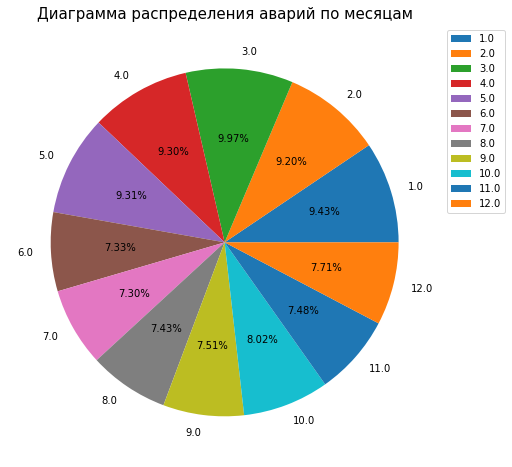

In [13]:
labels = col_month_df['collision_month']
sizes = col_month_df['collisions_number']
fig, ax = plt.subplots(figsize=(20, 8))
ax.pie(sizes, labels = labels, autopct='%1.2f%%')

ax.set_title('Диаграмма распределения аварий по месяцам', fontsize=15)
ax.legend(loc='upper left', bbox_to_anchor=(1.0, 1.0))

plt.show()

**Больше** всего аварий происходит в марте. 9.97% от всего кол-ва.

**Меньше** всего аварий случается в июле. 7.3% от всего кол-ва.

## Аналитические задачи для понимания данных.

**В рамках проекта необходимо поставить 6 задач для изучения даных. Затем провести исследование по 2 из них.**

- Найти самые частые причины ДТП. (parties)

- Провести анализ серьёзности повреждений транспортного средства, исходя из состояния дороги в момент ДТП (связать collisions и parties);

- Изучить как зависит серьезность повреждений от возраста авто. ('type of collision' и 'vehicle age');

- Проанализировать связь погодных условий и количества участников ДТП. ('party_number' из таблицы parties и 'weather1');

- Провести исследование как стоимость страховки свзана с серьезностью повреждений. ('COLLISION_DAMAGE' и 'INSURANCE_PREMIUM');

- Проверить как виновность участника связана с погодными условиями ('AT_FAULT' и 'weather1').



### Взаимосвязь виновности участника ДТП и погодных условий.

Для решения задачи из БД загружаются данные из двх таблиц. Collisions и parties.

In [14]:
query = '''
SELECT
    t1.weather_1,
    SUM(t2.at_fault) AS guilty,
    COUNT(t2.at_fault) AS total
    
FROM collisions AS t1
LEFT JOIN parties AS t2 USING(case_id)
GROUP BY t1.weather_1
'''

weather_guilty_df = pd.read_sql_query(query, con=engine)

In [15]:
weather_guilty_df['not_guilty'] = weather_guilty_df['total'] - weather_guilty_df['guilty']
weather_guilty_df

,weather_1,guilty,total,not_guilty
0,clear,1030212,2228413,1198201
1,cloudy,189351,385479,196128
2,fog,5711,10779,5068
3,other,1143,2646,1503
4,raining,54058,105861,51803
5,snowing,2400,4341,1941
6,wind,339,799,460
7,None,4913,14090,9177


In [16]:
#Замена пропуска в наименовании погодных условий:
weather_guilty_df['weather_1'] = weather_guilty_df['weather_1'].fillna('other')
weather_guilty_df

,weather_1,guilty,total,not_guilty
0,clear,1030212,2228413,1198201
1,cloudy,189351,385479,196128
2,fog,5711,10779,5068
3,other,1143,2646,1503
4,raining,54058,105861,51803
5,snowing,2400,4341,1941
6,wind,339,799,460
7,other,4913,14090,9177


In [17]:
#Т.к. общее кол-во аварий в зависимости от погодных условий имеет разные порядковые диапазоны, то заменим
#их количественные значения на относительные.

weather_guilty_df['guilty'] = weather_guilty_df['guilty'] / weather_guilty_df['total']
weather_guilty_df['not_guilty'] = weather_guilty_df['not_guilty'] / weather_guilty_df['total']

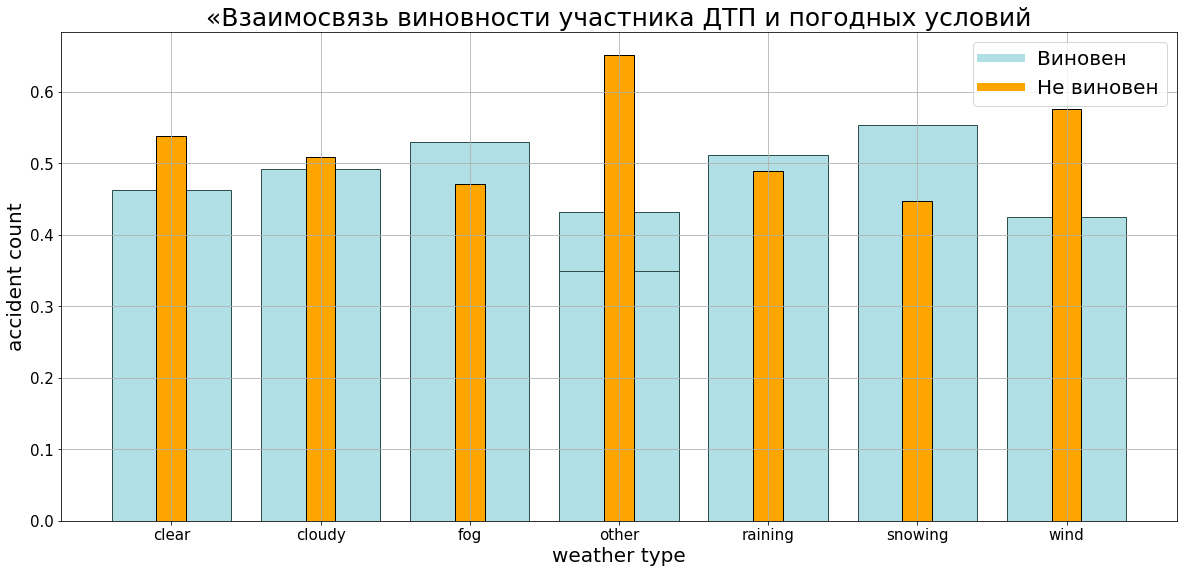

In [18]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.bar(weather_guilty_df['weather_1'], weather_guilty_df['guilty'], color='powderblue', edgecolor='darkslategray') 
ax.bar(weather_guilty_df['weather_1'], weather_guilty_df['not_guilty'], color='orange', edgecolor='black', width = 0.2)
ax.tick_params(axis='both', labelsize=15)

ax.set_xlabel('weather type', fontsize=20)
ax.set_ylabel('accident count', fontsize=20)
ax.set_title('«Взаимосвязь виновности участника ДТП и погодных условий', fontsize=25)
ax.grid(True)

# Создание объектов Line2D для легенды
guilty_legend = Line2D([0], [0], color='powderblue', linewidth=8, label='Виновен')
not_guilty_legend = Line2D([0], [0], color='orange', linewidth=8, label='Не виновен')
ax.legend(handles=[guilty_legend, not_guilty_legend], fontsize=20)  # Добавление легенды

plt.show()

**Вывод.** 

Из графика видно, что виновность водителей в ДТП чаще всего больше 50% только в случае выпадения осадков (туман, дождь, снег). 

###  Взаимосвязь стоимости страховки и серьезности повреждений.

К таблице parties присоединяется таблица collisions. Т.к. в parties case_id - не уникальное значение. И может быть одинаково для участников 1го ДТП.

In [19]:
query = '''
SELECT
    t1.case_id,
    t1.collision_damage,
    t2.insurance_premium 
    
FROM collisions AS t1
RIGHT JOIN parties AS t2 USING(case_id)
'''

damage_insuarance_df = pd.read_sql_query(query, con=engine)
damage_insuarance_df

,case_id,collision_damage,insurance_premium
0,3982918,scratch,59.0
1,4000753,small damage,NaN
2,4014984,fatal,63.0
3,4018996,middle damage,58.0
4,4021220,small damage,NaN
...,...,...,...
2752403,5456544,small damage,29.0
2752404,5456579,severe damage,26.0
2752405,5456610,small damage,20.0
2752406,5456619,middle damage,30.0


Анализ на неявные дубликаты.

In [20]:
damage_insuarance_df['collision_damage'].unique()

array(['scratch', 'small damage', 'fatal', 'middle damage',
       'severe damage'], dtype=object)

In [21]:
for i in damage_insuarance_df.columns:
    isna_sum = damage_insuarance_df[i].isna().sum()
    if isna_sum > 0:
        print(f'В данных признака {i} присутствует {isna_sum} пропусков')
    else:
        print(f'В данных признака {i} пропусков нет.')

В данных признака case_id пропусков нет.
В данных признака collision_damage пропусков нет.
В данных признака insurance_premium присутствует 405402 пропусков


В примерно 15% данных о стоимости страховки нет информации. Заменим пропуски на 0 для отображения на графике.

In [22]:
damage_insuarance_df['insurance_premium'] = damage_insuarance_df['insurance_premium'].fillna(0)

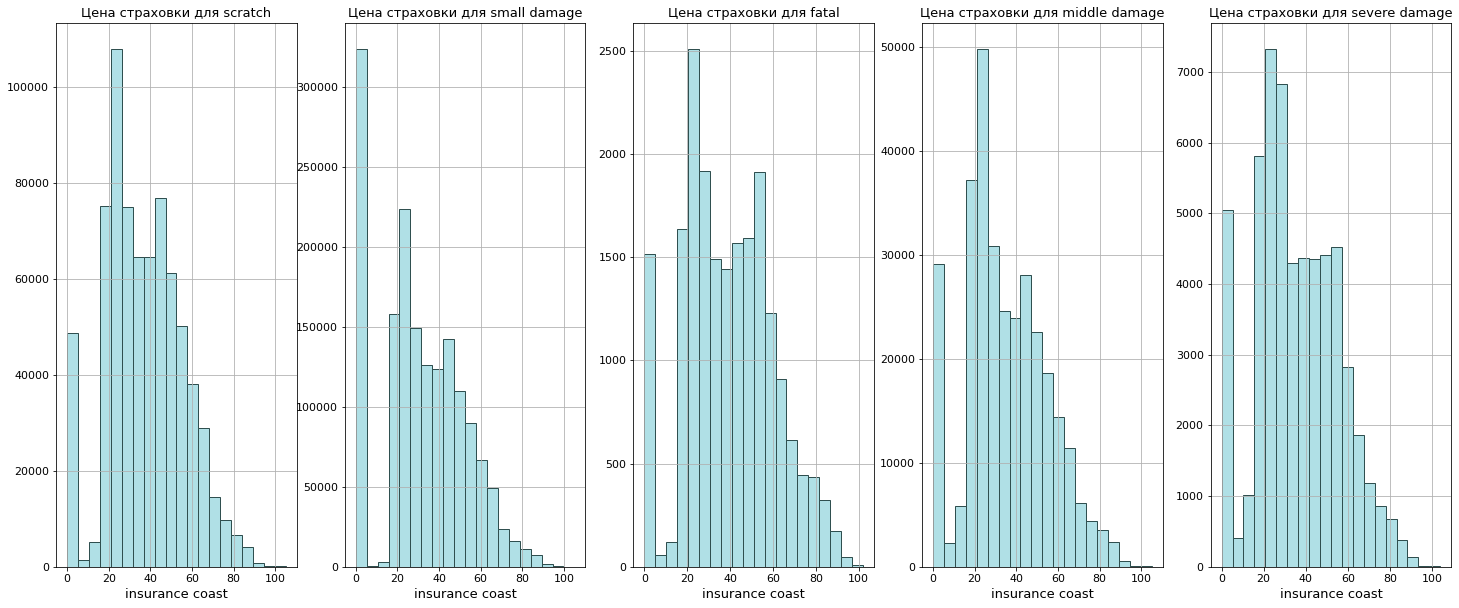

In [23]:
num_columns = 5
num_rows = 1

fig, axes = plt.subplots(num_rows, num_columns, figsize=(25, 10))
# Уникальные классы повреждений.
damages_unique = damage_insuarance_df['collision_damage'].unique()

for i, ax in enumerate(axes.flatten()):
    filtered_df = damage_insuarance_df[damage_insuarance_df['collision_damage'] == damages_unique[i]]
    if i < len(damages_unique):
        # Гистограмма для текущей класса повреждений
        filtered_df['insurance_premium'].hist(bins=20,
                                            color='powderblue',
                                            edgecolor='darkslategray',
                                            linewidth=1,
                                            ax=ax)
    ax.set_title(f'Цена страховки для {damages_unique[i]}',  fontsize=13)
    ax.tick_params(axis='both', labelsize=11)
    ax.set_xlabel('insurance coast', fontsize=13)
    
plt.show()


**Вывод:**

Из графиков распределения видно что для каждого типа повреждений авто стоимости страховок имеют примерно одинаковое распределение.

Стоит обратить анимание, что замена пропусков на 0 в данных, проведенная выше, выбивается из нормального распределения. Заполнение пропусков лучше производить на медианные значения.

Также графики распределения показывают, что в независимости от типа повреждения, большее количество выплат приходится на сумму в примерно 20.000.

# Разработка моделей ML для оценки водительского риска.

В качестве моделей для оценки водительского риска в проекте применяются следующие модели:
- CatBoost;
- LightGBM;
- Нейронная сеть.

Для построения первых дыух моделей не используется нормализация данных и кодирование признаков. 
Эти две опирации применяются только к моделе с нейронной стеью.

## Критерии для выбора данных.

- Тип виновника — только машина (car).
- ДТП привело к любым значимым повреждениям автомобиля любого из участников — все, кроме типа SCRATCH (царапина).
- Для моделирования используются данные только за 2012 год.
- Обязательное условие — учесть фактор возраста автомобиля.

Чтобы разработать модель для оценки водительского риска необходимо сформировать датаст из БД на основании вышеперечисленных критериев. Однако только этих критериев недостаточно. Так как не все признаки будут информативны для разрабатываемой модели. Ниже приведена таблица с пояснением, подходят ли признаки для формирования модели или нет.

Помимо признаков, которые войдут в датасет или не войдут, промаркированы признаки, которые могут быть использованы для дополнительного анализа. Они будут внесены в датасет. И будут использоваться в построении модели ML, которая будет вызодить за рамки поставленной задачи.

| Наименование признака    | Внесение данных в df | Обоснование |
|--------------------------|------------------------|--------------------------------------------|
| COLLISION_DATE           | Вносятся              | Данные необходимы для фильтрации и определения даты использования автомобиля. |
| COLLISION_TIME           | Вносятся              | Данные необходимы для определения времени начала использования автомобиля. |
| INTERSECTION             | Не вносятся           | До момента аварии данные не могут быть получены. |
| WEATHER_1                | Вносятся              | Данные очевидно влияют на вероятность ДТП. |
| COLLISION_DAMAGE         | Не вносятся           | До момента аварии данные не могут быть получены. |
| PRIMARY_COLL_FACTOR      | Не вносятся           | До момента аварии данные не могут быть получены. |
| ROAD_SURFACE             | Вносятся              | Состояние дороги влияет на определение вероятности аварии. |
| LIGHT                    | Вносятся              | Освещенность влияет на определение вероятности аварии. |
| DIRECTION                | Вносится              | Направление движения может влиять на вероятность ДТП|
| COUNTY_CITY_LOCATION     | Вносятся              | Предполагается, что авария и район посадки находятся в одном месте. |
| COUNTY_LOCATION          | Вносятся              | Предполагается, что авария и район посадки находятся в одном месте. |
| DISTANCE                 | Вносятся для дополнительного анализа           | При движении данный параметр может влить на вероятность ДТП. |
| LOCATION_TYPE            | Вносятся           | Данные могут пригодиться для построения маршрута, но не требуются для анализа. |
| PARTY_COUNT            | Не вносятся           | До момента аварии данные не могут быть получены.  |
| PCF_VIOLATION_CATEGORY            | Вносятся для дополнительного анализа           |Данные могут быть использованы при движении авто.|
| TYPE_OF_COLLISION            | Не вносятся           | До момента аварии данные не могут быть получены.  |
| MOTOR_VEHICLE_INVOLVED_WITH            | Не вносятся           | До момента аварии данные не могут быть получены.  |
| ROAD_CONDITION_1            | Вносятся           | Состояние дороги может влиять на вероятность ДТП. |
| PARTY_NUMBER             | Не вносятся           | До момента аварии данные не могут быть получены. |
| PARTY_TYPE               | Не вносятся          | До момента аварии данные не могут быть получены. |
| AT_FAULT                 | Вносятся              | Это целевой признак. |
| INSURANCE_PREMIUM        | Вносится              | Стоимость страховки может влиять на манеру вождения водителя. |
| PARTY_DRUG_PHYSICAL      | Вносится              | Общее состояние водителя может влиять на вероятность ДТП. |
| PARTY_SOBRIETY           | Вносится              | Количество алкоголя в крови водителя может влиять на вероятность ДТП. |
| CELLPHONE_IN_USE         | Вносится              | Телефон и, как следствие, телефонные звонки могут влиять на вероятность ДТП. |
| VEHICLE_AGE              | Вносится              | По условию задачи. |
| VEHICLE_TYPE             | Не вносятся           | Влияние на вероятность ДТП мало. |


## Выгрузка датафрейма из БД.

В датасет выгружаются признаки с учетом параметров для дополнительного анализа.

In [24]:
%%time
query = '''
SELECT
    t1.id,
    t1.case_id,
    t1.at_fault,
    t1.insurance_premium,
    t1.party_sobriety,
    t1.party_drug_physical,
    t1.cellphone_in_use,
    t1.party_number,
    t2.county_city_location,
    t2.county_location,
    t2.direction,
    t2.distance,
    t2.weather_1,
    t2.party_count,
    t2.pcf_violation_category,
    t2.type_of_collision,
    t2.motor_vehicle_involved_with,
    t2.road_surface,
    t2.road_condition_1,
    t2.lighting,
    t2.control_device,
    EXTRACT(MONTH FROM t2.collision_date) AS col_month,
    EXTRACT(DOW FROM t2.collision_date) AS day_of_week,
    EXTRACT(HOUR FROM t2.collision_time) AS hour,
    t3.vehicle_age,
    t3.party_number
FROM parties AS t1
LEFT JOIN collisions AS t2 USING(case_id)
LEFT JOIN vehicles AS t3 USING(case_id)
WHERE t2.collision_damage != 'scratch'
AND t1.party_type = 'car'
AND EXTRACT(YEAR FROM t2.collision_date) = 2012
AND t1.party_number = t3.party_number;
'''

driver_risk = pd.read_sql_query(query, con=engine)
driver_risk

CPU times: user 579 ms, sys: 172 ms, total: 751 ms
Wall time: 12.2 s


,id,case_id,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,party_number,county_city_location,county_location,...,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,col_month,day_of_week,hour,vehicle_age,party_number
0,2659603,5600885,1,43.0,had not been drinking,None,0.0,1,3607,san bernardino,...,other motor vehicle,dry,normal,dark with street lights,none,4.0,4.0,22.0,8.0,1
1,2395824,5449062,0,54.0,had not been drinking,None,0.0,2,0708,contra costa,...,other motor vehicle,dry,normal,dark with street lights,functioning,1.0,0.0,2.0,10.0,2
2,2672839,5608728,0,41.0,had not been drinking,None,0.0,1,0109,alameda,...,other motor vehicle,dry,normal,dusk or dawn,none,3.0,5.0,18.0,5.0,1
3,2673091,5608860,0,28.0,had not been drinking,None,0.0,2,4303,santa clara,...,other motor vehicle,dry,normal,daylight,none,4.0,3.0,11.0,0.0,2
4,2674405,5609619,1,44.0,None,under drug influence,0.0,1,1949,los angeles,...,fixed object,dry,normal,daylight,functioning,4.0,3.0,8.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56243,2670338,5607393,0,51.0,had not been drinking,None,0.0,2,2700,monterey,...,bicycle,dry,normal,dusk or dawn,none,4.0,5.0,6.0,8.0,2
56244,2671344,5607924,0,28.0,had not been drinking,None,0.0,3,1502,kern,...,parked motor vehicle,dry,normal,dark with street lights,none,5.0,5.0,22.0,4.0,3
56245,2671488,5608001,1,53.0,had not been drinking,None,0.0,1,5601,ventura,...,fixed object,dry,normal,daylight,none,4.0,1.0,11.0,8.0,1
56246,2671551,5608037,1,35.0,had not been drinking,None,0.0,1,3600,san bernardino,...,non-collision,dry,normal,dark with no street lights,functioning,4.0,0.0,20.0,5.0,1


**В результате SQLзапроса получен датасет для каждой поездки отдельно взятого авто.**

Примечание: 

        1) t1.party_number = t3.party_number - позволяет определить для кадого отдельного ДТП машины каждого из участников.
        2) Из БД выгружаеются лишь часы, дни недели и месяца, когда произошло ДТП, как наиболее репрезентативные данные о времени и дате ДТП.

## Cтатистическое исследование отобранных факторов.

### Общая информация о данных.

In [25]:
driver_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56248 entries, 0 to 56247
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           56248 non-null  int64  
 1   case_id                      56248 non-null  object 
 2   at_fault                     56248 non-null  int64  
 3   insurance_premium            55701 non-null  float64
 4   party_sobriety               55376 non-null  object 
 5   party_drug_physical          2857 non-null   object 
 6   cellphone_in_use             51777 non-null  float64
 7   party_number                 56248 non-null  int64  
 8   county_city_location         56248 non-null  object 
 9   county_location              56248 non-null  object 
 10  direction                    43230 non-null  object 
 11  distance                     56248 non-null  float64
 12  weather_1                    56080 non-null  object 
 13  party_count     

В дальнейшей работе следующие признаки не пригодятся:
'case_id', 'id', 'party_number'.

In [26]:
driver_risk = driver_risk.drop(['case_id', 'id', 'party_number'], axis = 1)
driver_risk

,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,county_city_location,county_location,direction,distance,weather_1,...,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,col_month,day_of_week,hour,vehicle_age
0,1,43.0,had not been drinking,None,0.0,3607,san bernardino,north,400.0,clear,...,broadside,other motor vehicle,dry,normal,dark with street lights,none,4.0,4.0,22.0,8.0
1,0,54.0,had not been drinking,None,0.0,0708,contra costa,east,21.0,clear,...,rear end,other motor vehicle,dry,normal,dark with street lights,functioning,1.0,0.0,2.0,10.0
2,0,41.0,had not been drinking,None,0.0,0109,alameda,west,500.0,cloudy,...,rear end,other motor vehicle,dry,normal,dusk or dawn,none,3.0,5.0,18.0,5.0
3,0,28.0,had not been drinking,None,0.0,4303,santa clara,east,160.0,clear,...,rear end,other motor vehicle,dry,normal,daylight,none,4.0,3.0,11.0,0.0
4,1,44.0,None,under drug influence,0.0,1949,los angeles,east,16.0,cloudy,...,hit object,fixed object,dry,normal,daylight,functioning,4.0,3.0,8.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56243,0,51.0,had not been drinking,None,0.0,2700,monterey,None,0.0,clear,...,broadside,bicycle,dry,normal,dusk or dawn,none,4.0,5.0,6.0,8.0
56244,0,28.0,had not been drinking,None,0.0,1502,kern,east,194.0,clear,...,rear end,parked motor vehicle,dry,normal,dark with street lights,none,5.0,5.0,22.0,4.0
56245,1,53.0,had not been drinking,None,0.0,5601,ventura,west,416.0,clear,...,hit object,fixed object,dry,normal,daylight,none,4.0,1.0,11.0,8.0
56246,1,35.0,had not been drinking,None,0.0,3600,san bernardino,south,250.0,clear,...,overturned,non-collision,dry,normal,dark with no street lights,functioning,4.0,0.0,20.0,5.0


В данных collision_time - для изучения интересны лишь часы ДТП. А в признаке collision_date - только дни недели и месяцы.

### Анализ на неявные дубликаты.

In [27]:
cat_columns = driver_risk.select_dtypes(include = 'object')
num_features = driver_risk.select_dtypes(include = ['int', 'float'])

In [28]:
for i in cat_columns.columns:
    print('________________________________________________________________________________')
    i_features_list = cat_columns[i].unique()
    print(f'Данные для признака {i}: {i_features_list}.')
    print('________________________________________________________________________________')

________________________________________________________________________________
Данные для признака party_sobriety: ['had not been drinking' None 'had been drinking, under influence'
 'impairment unknown' 'had been drinking, not under influence'
 'had been drinking, impairment unknown' 'not applicable'].
________________________________________________________________________________
________________________________________________________________________________
Данные для признака party_drug_physical: [None 'under drug influence' 'G' 'sleepy/fatigued' 'not applicable'
 'impairment - physical'].
________________________________________________________________________________
________________________________________________________________________________
Данные для признака county_city_location: ['3607' '0708' '0109' '4303' '1949' '3028' '3019' '4113' '3900' '3400'
 '4900' '3782' '3103' '0107' '2700' '3300' '5600' '3600' '3394' '5400'
 '3312' '1005' '1000' '1900' '5704' '3711' '5608'

Для данных 'county_city_location' тип данных необходимо аменить на 'int'.

In [29]:
driver_risk[['county_city_location']] = \
    driver_risk[['county_city_location']].astype(int)

**Неявные дубликаты отсутствуют.**

### Заполнение пропусков.

In [30]:
num_rows = driver_risk.shape[0]

for i in driver_risk.columns:
    nan_percent = driver_risk[i].isna().sum()*100 / num_rows

    #Количественные данные имеют очень малое кол-во пропусков. Их целесообразно заменить медианами.
    if i in num_features.columns: 
        i_median = driver_risk[i].median()
        driver_risk[i] = driver_risk[i].fillna(i_median)
        
    #Категориальные значения, которые имеют меньше 10% пропусков заменяются на наиболее частые значения.
    elif i in cat_columns.columns and nan_percent < 10:
        #Определение самого частого значения. idxmax() для индекса наиболее частого зн-я
        the_most_frequent_i = driver_risk[i].value_counts().idxmax()
        driver_risk[i] = driver_risk[i].fillna(the_most_frequent_i)    
    
    #Категориальные значения, которые имеют больше 10% пропусков заменяются на 'no_ifo'.
    elif i in cat_columns.columns and nan_percent > 10:
        driver_risk[i] = driver_risk[i].fillna('no_info') 
        

### Анализ на дубликаты.

In [31]:
duplicated_percent = driver_risk.duplicated().sum()*100 / num_rows
duplicated_percent

0.07289148058597639

In [32]:
#Т.к. процент дубликатов ничтожно мал - удалим их.
driver_risk = driver_risk.drop_duplicates()

**Дубликаты устранены.**

### Анализ распределения данных.

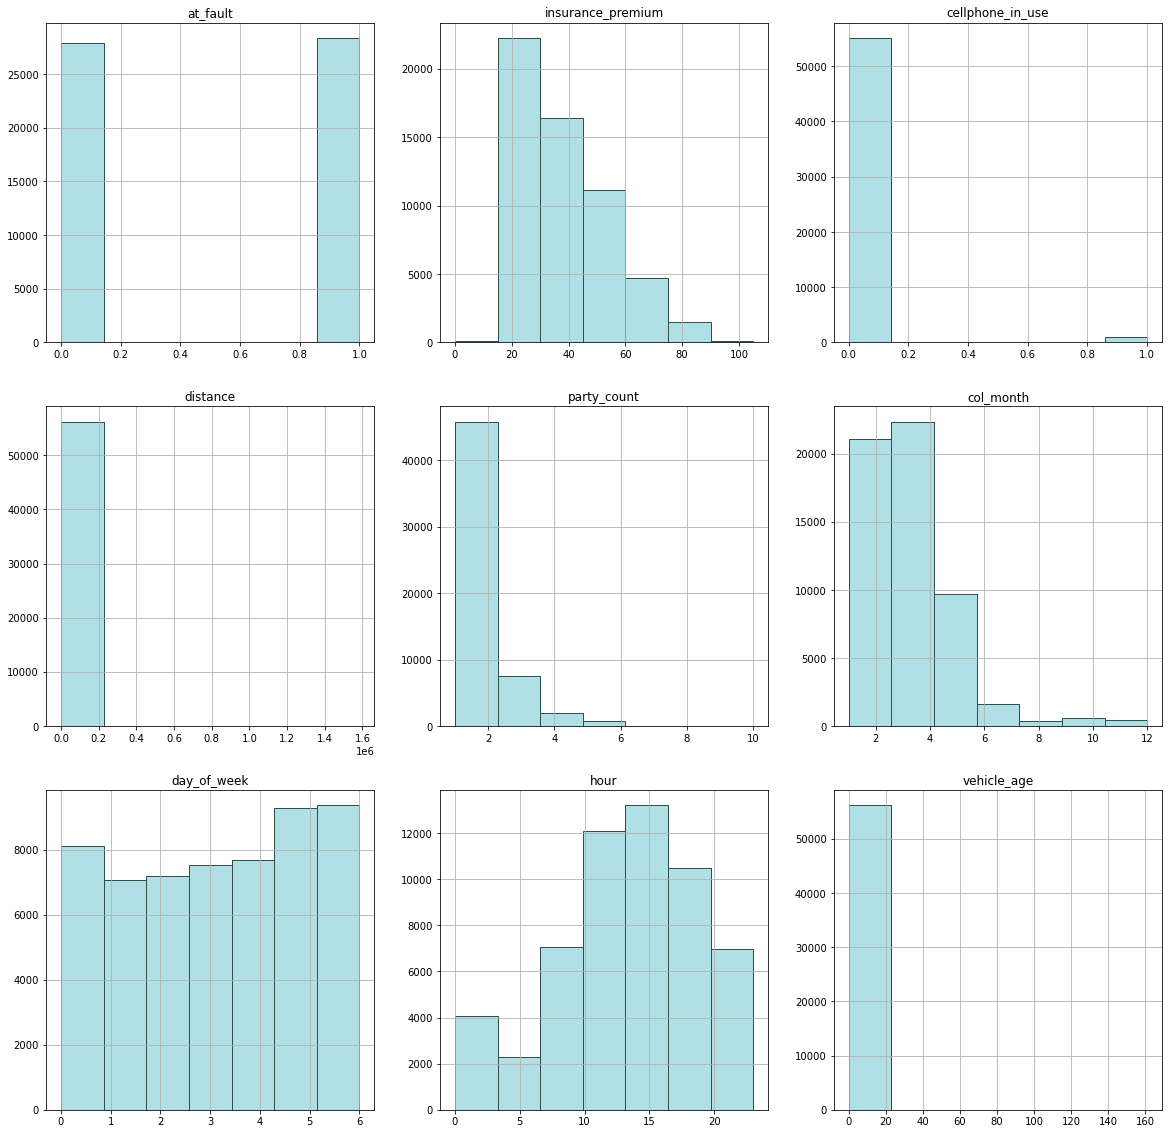

In [33]:
num_columns = 3
num_rows = 3

# Фигура и оси для каждого класса звезды.
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 20))

#Построение графика для кажлого признака
for i, ax in enumerate(axes.flatten()):

    driver_risk[num_features.columns[i]].hist(bins=7,
                                                    color='powderblue',
                                                    edgecolor='darkslategray',
                                                    linewidth=1,
                                                    ax=ax)
    ax.set_title(num_features.columns[i])

plt.show()


**Вывод:**

        1) Графики 'at_fault' и 'cellphone_in_use' по сути является категориальными и имеют два варианта. Либо - да, либо - нет. 
        2) Распределение на графике  'vehicle_age' выглядит не так как ожидалось. Скорее всего в графике присутствуют сильные выбросы в районе возраста авто - 120 лет.
        3) Остальные графики имеют ожидаемое распределенеие. Близкое к нормальному либо равномерному.

### vehicle_age

In [34]:
driver_risk['vehicle_age'].value_counts()

3.0      11002
4.0       8844
2.0       6045
5.0       5561
6.0       3938
7.0       3832
8.0       3507
0.0       3087
9.0       2767
1.0       2545
10.0      1941
11.0      1379
12.0       878
13.0       551
14.0       281
15.0        37
16.0         6
17.0         3
161.0        2
19.0         1
Name: vehicle_age, dtype: int64

Из анализа на уникальные значения видно, что есть выброс у двух авто с возрастом 161 год. Записи с этими авто удаляются из БД.

In [35]:
driver_risk = driver_risk[driver_risk['vehicle_age'] <160]

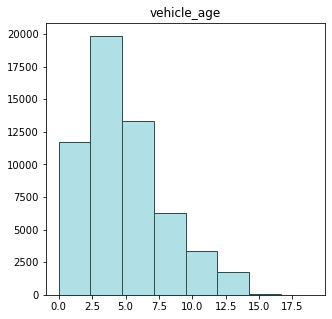

In [36]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.hist(driver_risk['vehicle_age'],
                            bins=8,
                            color='powderblue',
                            edgecolor='darkslategray',
                            linewidth=1)
ax.set_title('vehicle_age')

plt.show()

Теперь данные имеют распределение похожее на распределение Пуасона. 

### Преобразование времени

 Для учета цикличности времени преобразуем значения времени посадки в автомобиль на синусы от углов часовой стрелки на циферблате. Примем циферблат 24 формата, где 1 час соответсвует 15 градусам окружности.

In [37]:
# Вычисляется синус для каждого значения и обновляем столбец 'hour'
driver_risk['hour'] = driver_risk['hour'].apply(lambda x: math.sin(math.radians(x)))
driver_risk['hour']

0        0.374607
1        0.034899
2        0.309017
3        0.190809
4        0.139173
           ...   
56243    0.104528
56244    0.374607
56245    0.190809
56246    0.342020
56247    0.017452
Name: hour, Length: 56205, dtype: float64

### Анализ данных на мультиколлинеарность.

Для анализа признаков на мультиколлинеарность используется библиотека phik.Она позволяет выявить степень корреляции между категориальными и числовыми признаками.

In [38]:
%%time
#Матрица корреляции / Correlation matrix
phik_base = driver_risk.phik_matrix().round(2)
phik_base.head()

interval columns not set, guessing: ['at_fault', 'insurance_premium', 'cellphone_in_use', 'county_city_location', 'distance', 'party_count', 'col_month', 'day_of_week', 'hour', 'vehicle_age']
CPU times: user 2.81 s, sys: 375 ms, total: 3.19 s
Wall time: 4.79 s


,at_fault,insurance_premium,party_sobriety,party_drug_physical,cellphone_in_use,county_city_location,county_location,direction,distance,weather_1,...,type_of_collision,motor_vehicle_involved_with,road_surface,road_condition_1,lighting,control_device,col_month,day_of_week,hour,vehicle_age
at_fault,1.00,0.24,0.41,0.21,0.01,0.09,0.13,0.05,0.00,0.05,...,0.33,0.41,0.10,0.03,0.07,0.13,0.03,0.03,0.18,0.18
insurance_premium,0.24,1.00,0.13,0.08,0.00,0.06,0.10,0.05,0.00,0.02,...,0.10,0.10,0.03,0.01,0.18,0.04,0.04,0.04,0.21,0.86
party_sobriety,0.41,0.13,1.00,0.94,0.02,0.04,0.10,0.05,0.04,0.02,...,0.23,0.32,0.01,0.02,0.24,0.06,0.08,0.11,0.36,0.12
party_drug_physical,0.21,0.08,0.94,1.00,0.01,0.05,0.10,0.04,0.04,0.02,...,0.13,0.17,0.02,0.02,0.08,0.04,0.17,0.02,0.13,0.07
cellphone_in_use,0.01,0.00,0.02,0.01,1.00,0.14,0.35,0.02,0.00,0.02,...,0.02,0.01,0.03,0.01,0.01,0.03,0.02,0.01,0.01,0.02


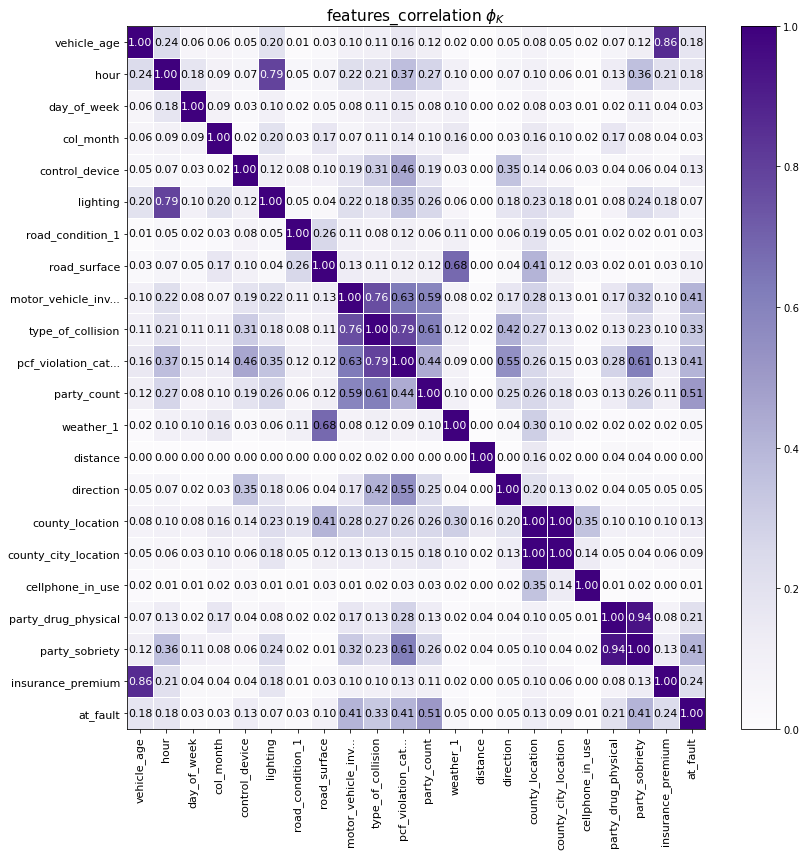

In [39]:
#Визуализация матрицы 𝜙k / 𝜙k matrix visualisation
plot_correlation_matrix(phik_base.values, 
                        x_labels=phik_base.columns, 
                        y_labels=phik_base.index, 
                        vmin=0, vmax=1, color_map="Purples", 
                        title=r"features_correlation $\phi_K$", 
                        fontsize_factor=1.1, 
                        figsize=(12, 12))
plt.tight_layout()

Из матрицы корреляции видно, что 'county_city_location' и 'county_location' полностью идентичны. Удаляется один из признаков.

In [40]:
driver_risk = driver_risk.drop('county_city_location', axis = 1)

## Разбиение данных на обучающую, валидационную и тестовую выборки.

Для реализации бизнес задачи необходимо оставить только те признаки, которые могут быть получены в момент посадки человека в авто. 

In [42]:
#Определение целевого признака и набора фичей.
y = driver_risk['at_fault']
X = driver_risk.drop(['at_fault', 'pcf_violation_category', 'distance'], axis = 1) 

#Тренировочная выборка
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 12345) 

#Тестовая и валидационная выборки.
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 12345)

# Определение лучшей модели ML.

В контесте задачин необходимо исследовать основные факторы ДТП, обеспечивая при этом адекватную систему оценки водительского риска, как можно точнее и полнее выявлять виновных в ДТП. 

Для реализации этой задачи выбирается метрика F1, которая комбинирует точность (способность не помечать невиновных как виновных) и полноту (способность обнаруживать всех виновных) в единый показатель.

Для анализа качества моделей и выбора наилучшей из них - формируется сводная таблица с результатами работ каждой из них.

In [43]:
data_analis = {'ML model' : [],
              'Description' : [],
              'F1_score' : []}
result_data = pd.DataFrame(data_analis)
result_data

,ML model,Description,F1_score


## CatBoost

In [44]:
#Определение категориальных данных:
cat_features = list(X.select_dtypes(include = 'object').columns)
cat_features

['party_sobriety',
 'party_drug_physical',
 'county_location',
 'direction',
 'weather_1',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'road_surface',
 'road_condition_1',
 'lighting',
 'control_device']

In [45]:
param_grid = {
    'iterations': range(100, 2000, 500),
    'depth': range(1, 10, 2),
    'learning_rate': [0.01, 0.1, 0.02]
}

In [46]:
# Инициализация модели
cbc_model = cb.CatBoostClassifier()

In [47]:
# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=cbc_model, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='f1', 
                           verbose=1
                          )

In [48]:
%%time
# Обучение на тренировочных данных
grid_search.fit(X_train, y_train, cat_features = cat_features, verbose=0)

Fitting 3 folds for each of 60 candidates, totalling 180 fits
CPU times: user 3h 18min 39s, sys: 51min, total: 4h 9min 40s
Wall time: 37min 37s


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ff03018c670>,
             param_grid={'depth': range(1, 10, 2),
                         'iterations': range(100, 2000, 500),
                         'learning_rate': [0.01, 0.1, 0.02]},
             scoring='f1', verbose=1)

In [49]:
# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)

# Лучшие гиперпараметры
best_cbc_parameters = grid_search.best_params_

Лучшие параметры: {'depth': 7, 'iterations': 1600, 'learning_rate': 0.02}


Лучшие параметры: {'depth': 7, 'iterations': 1600, 'learning_rate': 0.02}

In [50]:
%%time
rndm = 42
cbc = cb.CatBoostClassifier(**best_cbc_parameters,
                            random_seed=rndm,
                            boosting_type='Ordered',
                            eval_metric = 'Logloss',
                            custom_metric=['F1']
                          )
cbc.fit(X_train,y_train, 
        cat_features = cat_features, 
        verbose=False,
        plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 7min 35s, sys: 29 s, total: 8min 4s
Wall time: 58.4 s


In [51]:
prediction = cbc.predict(X_valid, verbose=None)

# Получение результатов метрики F1 на валидационном наборе
f1 = f1_score(y_valid, prediction)

print(f'F1 Score on Validation Set: {f1}')


F1 Score on Validation Set: 0.6706239646604085


In [53]:
data_append= {'ML model' : 'CatBoost',
              'Description'  : 'CrossValidation & Greed search',
              'F1_score' : f1}
result_data = result_data.append(data_append, ignore_index=True)
result_data

/var/folders/th/9xw9c71j3d34kscxr4b5q7m80000gn/T/ipykernel_65650/336641948.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_data = result_data.append(data_append, ignore_index=True)


,ML model,Description,F1_score,hiper parameters
0,CatBoost,NaN,0.670624,CrossValidation & Greed search
1,CatBoost,CrossValidation & Greed search,0.670624,NaN


## LightGBM

В lightGBM все категориальные признаки должны иметь тип данных 'category'.

In [54]:
X_train_gbm = X_train.copy()
X_valid_gbm = X_valid.copy()
for cat in cat_features:
    X_train_gbm[cat] = X_train[cat].astype('category')
    X_valid_gbm[cat] = X_valid[cat].astype('category')
X_train_gbm.info()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39343 entries, 45776 to 20973
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   insurance_premium            39343 non-null  float64 
 1   party_sobriety               39343 non-null  category
 2   party_drug_physical          39343 non-null  category
 3   cellphone_in_use             39343 non-null  float64 
 4   county_location              39343 non-null  category
 5   direction                    39343 non-null  category
 6   weather_1                    39343 non-null  category
 7   party_count                  39343 non-null  int64   
 8   type_of_collision            39343 non-null  category
 9   motor_vehicle_involved_with  39343 non-null  category
 10  road_surface                 39343 non-null  category
 11  road_condition_1             39343 non-null  category
 12  lighting                     39343 non-null  category
 1

In [55]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000, 2000],
    'max_depth': [3, 5, 7, 10]
}

In [56]:
# Инициализация модели
lgb_model = lgb.LGBMClassifier()

In [57]:
# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=lgb_model, 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='f1', 
                           verbose=0
                          )

# Обучение на тренировочных данных
grid_search.fit(X_train_gbm, y_train)

# Вывод лучших параметров
print("Лучшие параметры:", grid_search.best_params_)

# Лучшие гиперпараметры
best_lgb_parameters = grid_search.best_params_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^m

#Лучшие параметры: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}

In [58]:
#Обучение модели на лучших гиперпарасетрах.
train_data = lgb.Dataset ( X_train_gbm , label = y_train,
                           categorical_feature = cat_features
                           )

num_round = 10000
lgb_model = lgb.train(best_lgb_parameters, train_data, num_round)

/Users/maksimgorskov/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:151: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/Users/maksimgorskov/opt/anaconda3/lib/python3.9/site-packages/lightgbm/basic.py:1551: UserWarning: Using categorical_feature in Dataset.
  warnings.warn('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002838 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 39343, number of used features: 18
[LightGBM] [Info] Start training from score 0.502987
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


Предсказания в данном случае выводят вероятности исхода 1 или 0. Для корректного решения задачи классификации указывается пороговое значение 0.5.

In [59]:
ypred = lgb_model.predict(X_valid_gbm)

#Введение порогового значения
threshold = 0.5
y_pred_binary = (ypred > threshold).astype(int)
f1 = f1_score(y_valid, y_pred_binary)

In [60]:
print(f'Метрика F1 для модели LightGBM равна {f1}')

Метрика F1 для модели LightGBM равна 0.668436495738438


In [61]:
data_append= {'ML model' : 'LightGBM',
              'Description' : '-',
              'F1_score' : f1}
result_data = result_data.append(data_append, ignore_index=True)
result_data

/var/folders/th/9xw9c71j3d34kscxr4b5q7m80000gn/T/ipykernel_65650/2598804997.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_data = result_data.append(data_append, ignore_index=True)


,ML model,Description,F1_score,hiper parameters
0,CatBoost,NaN,0.670624,CrossValidation & Greed search
1,CatBoost,CrossValidation & Greed search,0.670624,NaN
2,LightGBM,-,0.668436,NaN


## Построение нейронной сети. 

### Кодирование данных. OHE & StandardScaler. Pipeline

In [62]:
#Выделение количественных признаков.
NUMERIC_COLUMNS = X_train.select_dtypes(include = ['int', 'float']).columns.tolist()

#Выделение категориальных признаков. 
CAT_COLUMNNS = X_train.select_dtypes(include = 'object').columns.tolist()
print(f'Список числовых признаков: {NUMERIC_COLUMNS}')
print()
print(f'Список категориальных признаков: {CAT_COLUMNNS}')

Список числовых признаков: ['insurance_premium', 'cellphone_in_use', 'party_count', 'col_month', 'day_of_week', 'hour', 'vehicle_age']

Список категориальных признаков: ['party_sobriety', 'party_drug_physical', 'county_location', 'direction', 'weather_1', 'type_of_collision', 'motor_vehicle_involved_with', 'road_surface', 'road_condition_1', 'lighting', 'control_device']


In [63]:
#Cоздание трансформера для числовых столбцов
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())]) #StandardScaler()

#Cоздание трансформера для категориальных столбцов
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='error', drop='first'))])

In [64]:
#создание общего трансформера
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, NUMERIC_COLUMNS),
        ('cat', categorical_transformer, CAT_COLUMNNS)],
        remainder='passthrough'
)

#создание полного пайплайна
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

#применение пайплайна
X_train_transformed = pipeline.fit_transform(X_train)
X_valid_transformed = pipeline.transform(X_valid)

In [65]:
#преобразование разреженной матрицы, выходящей из пайплайна, в датафрейм

onehot = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']

categorical_features = onehot.get_feature_names(CAT_COLUMNNS)
all_features = np.concatenate([NUMERIC_COLUMNS, categorical_features]).tolist()

#Преобразования разреженной матрицы (sparse matrix) в плотный массив (dense array) методом toarray().
X_train_transformed_df = pd.DataFrame(X_train_transformed.toarray(), columns = all_features)
X_valid_transformed_df = pd.DataFrame(X_valid_transformed.toarray(), columns = all_features)

/Users/maksimgorskov/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Создание архитектуры нейронной сети.

In [66]:
class NeuralNet (nn.Module):
    def __init__ (self,
                    n_in_neurons,
                    n_hidden_neurons_1,
                    n_hidden_neurons_2,
                    n_hidden_neurons_3,
                    out_neurons, p):
    
        super(NeuralNet, self).__init__()

        #Создание полносвязного графа
        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.fc = nn.Linear(n_hidden_neurons_3, out_neurons)

        #Создание функции активации
        self.act1 = nn.ReLU()
        self.act2 = nn.SiLU()
        self.act3 = nn.Sigmoid()

        #формула для расчета стандартного отклонения 
        #std = (2/(n+(n+1)))**0.5, где n - кол-во нейронов в 1 слое

        #Инициализация весов и отступов
        std1 = (2/(n_in_neurons + n_hidden_neurons_1))**0.5
        nn.init.normal_(self.fc1.weight, mean=0, std=std1)
        nn.init.normal_(self.fc1.bias, mean=0, std=std1)

        std2 = (2/(n_hidden_neurons_1 + n_hidden_neurons_2))**0.5
        nn.init.normal_(self.fc2.weight, mean=0, std=std2)
        nn.init.normal_(self.fc2.bias, mean=0, std=std2)

        std3 = (2/(n_hidden_neurons_2 + n_hidden_neurons_3))**0.5
        nn.init.normal_(self.fc3.weight, mean=0, std=std3)
        nn.init.normal_(self.fc3.bias, mean=0, std=std3)


        #Введение dropout
        self.dp1 = nn.Dropout(p=p)
        self.dp2 = nn.Dropout(p=p)
        self.dp3 = nn.Dropout(p=p)


    def forward(self, x):
        out = self.fc1(x)
        out = self.act1(out)
        out = self.dp1(out)

        out = self.fc2(out)
        out = self.act2(out)
        out = self.dp2(out)

        out = self.fc3(out)
        out = self.act3(out)
        out = self.dp3(out)

        out = self.fc(out)

        return out

In [67]:
#Перевод данных в тензор.
X_train_nn = torch.FloatTensor(X_train_transformed_df.values)
X_valid_nn = torch.FloatTensor(X_valid_transformed_df.values)
y_train_nn = torch.FloatTensor(y_train.values)
y_valid_nn = torch.FloatTensor(y_valid.values)

In [68]:
#Задание количества нейронов в слоях нейронной сети.
n_in_neurons = X_train_nn.shape[1]
n_hidden_neurons_1 = 140
n_hidden_neurons_2 = 60
n_hidden_neurons_3 =20
n_out_neurons = 1


In [69]:
#Заданеи слоев для нейронной сети 
net_layers = [n_in_neurons, 
              n_hidden_neurons_1, 
              n_hidden_neurons_2, 
              n_hidden_neurons_3,  
              n_out_neurons] 

#количество эпох обучения нейронки
num_epoch =10000

#скорость обучения
learning_rate = 0.001

#random_state для train_test_split
rand_st = 42

In [70]:
#Фиксация значений у рандомайзеров для вопроизводимости результатов
random.seed(rand_st)
np.random.seed(rand_st)
torch.manual_seed(rand_st)
torch.use_deterministic_algorithms(True)

net = NeuralNet(*net_layers, 0.1) #Base Line строится без Dropout
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)
loss_function = nn.BCEWithLogitsLoss()

best_f1 = 0

patience = 10  #количество эпох без улучшений после которых обучение будет остановлено
patience_counter = 0

In [71]:
for epoch in range(num_epoch):
    net.train()
    optimizer.zero_grad() #Обнуление градиентов
    
    predictions_train = net.forward(X_train_nn).flatten()
    binary_predictions_train = (predictions_train >= 0.5).int()
    
    loss_value = loss_function(predictions_train, y_train_nn)
    loss_value.backward()
    
    optimizer.step()
    
    if epoch%10 == 0:
        with torch.no_grad():
        
            net.eval()
            predictions_val = net.forward(X_valid_nn).flatten()
            binary_predictions_val = (predictions_val >= 0.5).int()
            
            f1 = f1_score(y_valid, binary_predictions_val)

            if epoch%500 == 0:
                print(f'F1 Score for {epoch + 500} epoch: {f1:.3f}')
            
            if f1 > best_f1:
                best_f1 = f1
                best_model = copy.deepcopy(net.state_dict())
                patience_counter = 0
            else:
                patience_counter += 1

            if patience_counter >= patience:
                print("Early stopping")
                break
        
# Восстанавливаем лучшую модель
net.load_state_dict(best_model)
net.eval()
predictions_val = net.forward(X_valid_nn).flatten()
binary_predictions_val = (predictions_val >= 0.5).int()
f1 = f1_score(y_valid_nn, binary_predictions_val)
print(f'Best F1 Score: {f1:.3f}')

F1 Score for 500 epoch: 0.000
Early stopping
Best F1 Score: 0.625


In [72]:
data_append= {'ML model' : 'NeuralNet',
              'Description'   : '-',
              'F1_score' : f1}
result_data = result_data.append(data_append, ignore_index=True)
result_data

/var/folders/th/9xw9c71j3d34kscxr4b5q7m80000gn/T/ipykernel_65650/299073675.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_data = result_data.append(data_append, ignore_index=True)


,ML model,Description,F1_score,hiper parameters
0,CatBoost,NaN,0.670624,CrossValidation & Greed search
1,CatBoost,CrossValidation & Greed search,0.670624,NaN
2,LightGBM,-,0.668436,NaN
3,NeuralNet,-,0.624694,NaN


**Вывод по результатам работы моделей ML.**

Модели предсказывают результат приблизительно одинаково, что может указывать на вцелом правильную работу каждой из моделей.

Лучшим образом показала себя модель CatBoost.

# Проверка работы лучшей модели. 

## Предсказание на тестовой выборке.

Для обученной модели производится предсказание на тестовой выборке. Идет сравнение с целевым признаком тестовой выборки. Определяется метрика f1.

In [73]:
prediction_cat_1 = cbc.predict(X_test, verbose=None)

# Получение результатов метрики F1 на валидационном наборе
f1 = f1_score(y_test, prediction_cat_1)

print(f'F1 Score on Validation Set: {f1}')


F1 Score on Validation Set: 0.6722846441947566


Метрика f1 схожа с той, что получилась при обучении на тестовой выборке. Это говорит о правильности ее работы.

In [74]:
data_append= {'ML model' : 'CatBoost',
              'Description' : 'Test_sample',
              'F1_score' : f1}
result_data = result_data.append(data_append, ignore_index=True)
result_data

/var/folders/th/9xw9c71j3d34kscxr4b5q7m80000gn/T/ipykernel_65650/726221631.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_data = result_data.append(data_append, ignore_index=True)


,ML model,Description,F1_score,hiper parameters
0,CatBoost,NaN,0.670624,CrossValidation & Greed search
1,CatBoost,CrossValidation & Greed search,0.670624,NaN
2,LightGBM,-,0.668436,NaN
3,NeuralNet,-,0.624694,NaN
4,CatBoost,Test_sample,0.672285,NaN


## Графический анализ «Матрицы ошибок».

Confusion matrix, without normalization
[[3468  616]
 [1834 2513]]


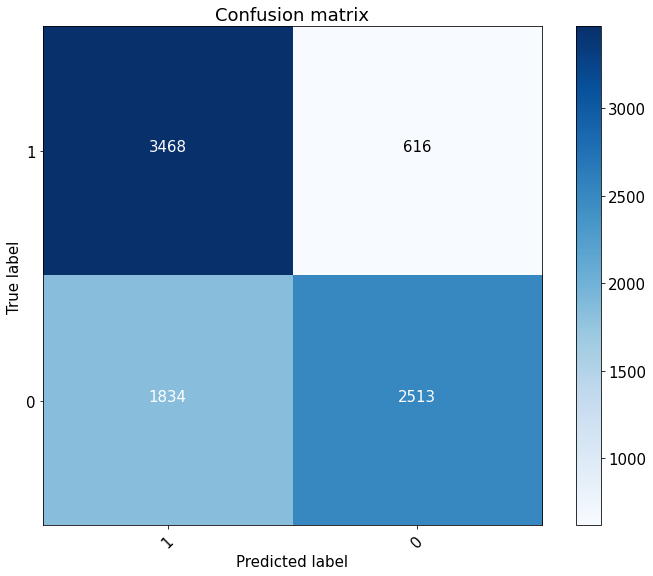

In [75]:
#Функция построения матрицы ошибок из документации sklearn

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, prediction_cat_1)
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['1', '0'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

- True Positive : 3688
- False Positive : 505
- False Negative : 1677
- True Negative : 2560

Из матрицы ошибок видно, что True Positive и True Negative ответы составляют примерно 70% правильных ответов, что соответствует метрике f1.


## Предложение по улучшению работы системы.

В соответствии с разделом, где описывается какие данные будут входить в датасет для обучения, было выбрано два признака которые могут использоваться для работы системы во время движения авто 'pcf_violation_category' и 'distance'.

**Гипотеза:** В данном разделе делается предположение, что оснащение автомобиля камерами и сисетмой отслеживания текущего местоположения может улучшить работу модели.

В этом случае признаки 'pcf_violation_category' и 'distance' могут быть учтены в моделе ML.

Ниже обучается новая модель CatBoost на всех выбранных признаках.

In [76]:
#Определение целевого признака и набора фичей.
y = driver_risk['at_fault']
X = driver_risk.drop(['at_fault'], axis = 1) 

#Тренировочная выборка
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.3, random_state = 12345) 

#Тестовая и валидационная выборки.
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size = 0.5, random_state = 12345)

In [77]:
#Определение категориальных данных:
cat_features = list(X.select_dtypes(include = 'object').columns)
cat_features

['party_sobriety',
 'party_drug_physical',
 'county_location',
 'direction',
 'weather_1',
 'pcf_violation_category',
 'type_of_collision',
 'motor_vehicle_involved_with',
 'road_surface',
 'road_condition_1',
 'lighting',
 'control_device']

In [79]:
%%time
# Модель обучается на лучших гиперпараметров предыдущей модели CatBoost.
rndm = 42
cbc_1 = cb.CatBoostClassifier(**best_cbc_parameters,
                            random_seed=rndm,
                            boosting_type='Ordered',
                            eval_metric = 'Logloss',
                            custom_metric=['F1']
                          )
cbc_1.fit(X_train,y_train, 
        cat_features = cat_features, 
        verbose=False,
        plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CPU times: user 8min 1s, sys: 33.3 s, total: 8min 34s
Wall time: 1min 5s


In [85]:
prediction = cbc_1.predict(X_valid, verbose=None)

# Получение результатов метрики F1 на валидационном наборе
f1 = f1_score(y_valid, prediction)

print(f'F1 Score on Validation Set: {f1}')


F1 Score on Validation Set: 0.7018505825908157


In [86]:
data_append= {'ML model' : 'CatBoost',
              'Description'  : 'improved system_valid',
              'F1_score' : f1}
result_data = result_data.append(data_append, ignore_index=True)
result_data

/var/folders/th/9xw9c71j3d34kscxr4b5q7m80000gn/T/ipykernel_65650/1176691411.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_data = result_data.append(data_append, ignore_index=True)


,ML model,Description,F1_score,hiper parameters
0,CatBoost,NaN,0.670624,CrossValidation & Greed search
1,CatBoost,CrossValidation & Greed search,0.670624,NaN
2,LightGBM,-,0.668436,NaN
3,NeuralNet,-,0.624694,NaN
4,CatBoost,Test_sample,0.672285,NaN
5,CatBoost,improved system_valid,0.701851,NaN


**Проверка на тестовой выборке.**

In [87]:
prediction_cat_2 = cbc_1.predict(X_test, verbose=None)

# Получение результатов метрики F1 на валидационном наборе
f1 = f1_score(y_test, prediction_cat_2)

print(f'F1 Score on Validation Set: {f1}')

F1 Score on Validation Set: 0.7022352315061202


In [88]:
data_append= {'ML model' : 'CatBoost',
              'Description'  : 'improved system_test',
              'F1_score' : f1}
result_data = result_data.append(data_append, ignore_index=True)
result_data

/var/folders/th/9xw9c71j3d34kscxr4b5q7m80000gn/T/ipykernel_65650/1995555820.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_data = result_data.append(data_append, ignore_index=True)


,ML model,Description,F1_score,hiper parameters
0,CatBoost,NaN,0.670624,CrossValidation & Greed search
1,CatBoost,CrossValidation & Greed search,0.670624,NaN
2,LightGBM,-,0.668436,NaN
3,NeuralNet,-,0.624694,NaN
4,CatBoost,Test_sample,0.672285,NaN
5,CatBoost,improved system_valid,0.701851,NaN
6,CatBoost,improved system_test,0.702235,NaN


**Вывод.**
Гипотеза оказалась верной. Анализ системой движения автомобиля улучшает ее работу.

## Анализ важности основных факторов, влияющих на вероятность ДТП.

In [89]:
cbc_1.get_feature_importance(prettified = True)

,Feature Id,Importances
0,pcf_violation_category,30.759915
1,party_sobriety,16.634190
2,party_count,16.265399
3,motor_vehicle_involved_with,8.202413
4,insurance_premium,7.940433
5,party_drug_physical,5.638935
6,vehicle_age,1.974304
7,distance,1.849401
8,lighting,1.694778
9,county_location,1.587900


Самым выжным признаком оказался pcf_violation_category. Который характеризует нарушения водителя в момент времени.


## График зависимости pcf_violation_category фактора и целевой переменной.

График строится для всех значений изначального датасета. Для построения графика группируются классы параметра pcf_violation_category и рассчитывается процент, который показывает частоту влияния класса на аварию.

In [90]:
violation_qty_1 = driver_risk.groupby('pcf_violation_category')['at_fault'].sum()
violation_qty_0 = driver_risk.groupby('pcf_violation_category')['at_fault'].count()
merged_df = pd.merge(violation_qty_1, violation_qty_0, on='pcf_violation_category')
merged_df['at_fault_influence'] = merged_df['at_fault_x'] / merged_df['at_fault_y']
merged_df

,at_fault_x,at_fault_y,at_fault_influence
pcf_violation_category,,,
automobile right of way,3131,7138,0.438638
brakes,6,10,0.600000
dui,4379,6216,0.704472
fell asleep,1,3,0.333333
following too closely,403,1014,0.397436
hazardous parking,20,32,0.625000
impeding traffic,11,33,0.333333
improper passing,236,477,0.494759
improper turning,6078,8189,0.742215


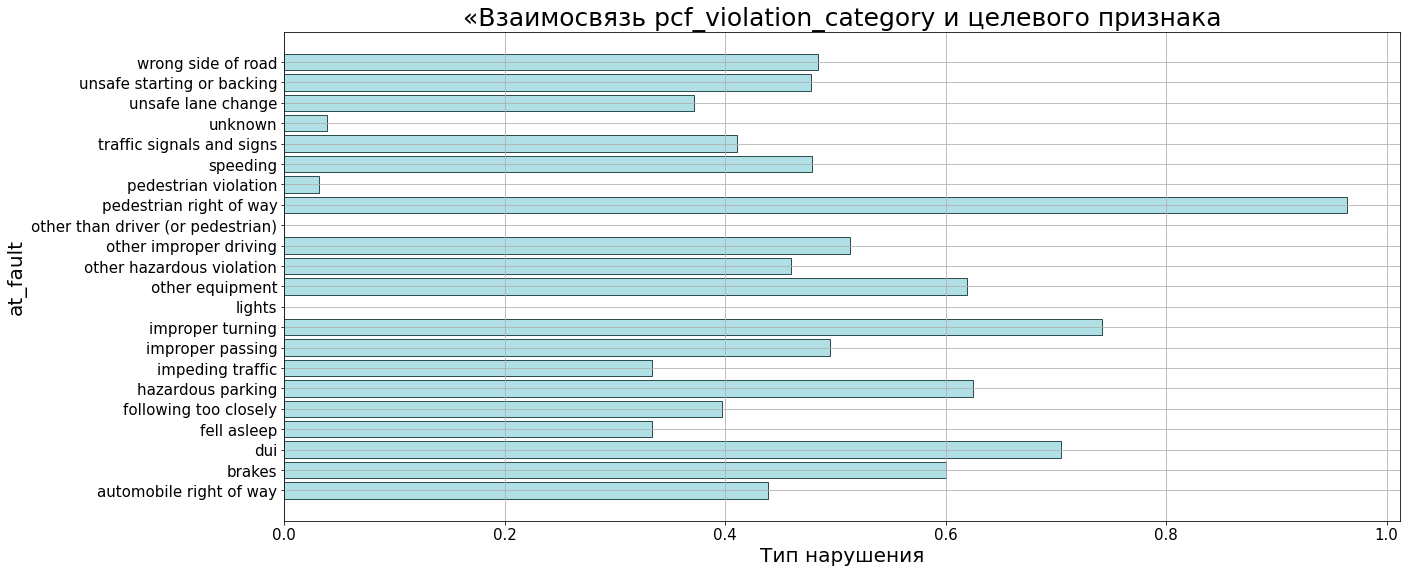

In [91]:
fig, ax = plt.subplots(figsize=(20, 9))
ax.barh(merged_df.index,
       merged_df['at_fault_influence'],
       color='powderblue', 
       edgecolor='darkslategray') 
ax.tick_params(axis='both', labelsize=15)

ax.set_xlabel('Тип нарушения', fontsize=20)
ax.set_ylabel('at_fault', fontsize=20)
ax.set_title('«Взаимосвязь pcf_violation_category и целевого признака', fontsize=25)
ax.grid(True)

plt.show()

Из графика видно, что водители очень часто не пропускают пешеходов, поворачивают там, где нельзя. Также очень сильное влияние оказывает класс dui - водитель находится под влиянием алкоголя/ наркотических веществ.


Для минимизации обозначенных факторов во время посадки водителя в авто, необходимо предусмотреть системы, которые будут способны контролировать нарушения, допускаемые водителем, а также будут проверять водителя на трезвость.

# Вывод.

Лучшей моделью для решения обзначенной задачи является модель CatBooost с подобранными гиперпараметрами методом GridSearch с использованием кроссвалидации.

Лучшие параметры модели: {'depth': 7, 'iterations': 1600, 'learning_rate': 0.02}
                            boosting_type='Ordered',
                            eval_metric = 'Logloss',
                            custom_metric=['F1'].
                            
                            

**Анализ результатов модели.**

Лучшая модель CatBoost показала метрику f1 = 0.702. Это означает что во время посадки водителя в авто, при условии что авто оборудовано системой анализа трезвости водителя, а также системами контроля за нарушениями ПДД.

Возможные пути улучшения метрики:
Чтобы улучшить оценку вероятности аварии имеет смысл собирать данные о построенном маршруте движения.
- Предполагаемое время движения. Позволит рассчитывать усталость водителя в дороге а также изменение времени суток и погодных условий.
- Количество перекрестков. Позволит увязать данные об авариях на перекрестках с маршрутом движения.
- Типы дорог. (городские, автострады и т.д.) Позволит увязать данные об авариях на типах дорог с маршрутом движения.